# Oil Well Location Prediction

## Introduction
The discovery of new oil wells plays a pivotal role in the energy industry, directly impacting global economic and energy landscapes. Predicting optimal oil well locations is a data-intensive challenge, requiring advanced statistical modeling and machine learning techniques. This project focuses on leveraging data from three distinct regions to predict oil production levels and identify the most profitable locations for development. By analyzing and comparing datasets, the project aims to optimize investment decisions and minimize financial risk, ensuring an effective allocation of resources.

## Load and Prepare the Data

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample 
from numpy.random import RandomState

In [ ]:
# Load the datasets for all regions
region_1 = pd.read_csv('geo_data_0.csv')
region_2 = pd.read_csv('geo_data_1.csv')
region_3 = pd.read_csv('geo_data_2.csv')

# Check the first few rows of each dataset to ensure they are loaded correctly and display info on each dataset
print('---Region 1---')
display(region_1.head())
display(region_1.describe())
display(region_1.info())
print()
print('---Region 2---')
display(region_2.head())
display(region_2.describe())
display(region_2.info())
print()
print('---Region 3---')
display(region_3.head())
display(region_3.describe())
display(region_3.info())

---Region 1---


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


---Region 2---


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


---Region 3---


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

There data has been loaded correctly, the amount of entries for each dataset is 100k and the data types are appropriate for each column. 

### Check for missing and duplicate values

In [3]:
region_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [4]:
region_1.duplicated().sum()

0

In [5]:
region_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [6]:
region_2.duplicated().sum()

0

In [7]:
region_3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [8]:
region_3.duplicated().sum()

0

There are no missing or duplicate values in any dataset. Next we will merge the datasets.

### Merge the data

In [9]:
# Add a column indicating the region for identification later
region_1['region'] = 1
region_2['region'] = 2
region_3['region'] = 3

# Combine all datasets into one
region_data = pd.concat([region_1, region_2, region_3], ignore_index=True)

# Check the combined data
print(region_data.sample(10))

           id         f0        f1        f2     product  region
269629  pIWPh   2.477266  0.315327  3.992097   81.760878       3
236326  965sd   2.385407 -1.276211  2.307246   50.595182       3
121104  s2iVI  -4.296583 -5.023074  1.998230   57.085625       2
238009  8wc6q   1.754906 -0.048720  1.186424   53.308387       3
281065  PuPjO  -1.120449  0.237737  4.415641  128.938311       3
34723   SeDSt   0.855366  0.491489 -3.662222    6.671557       1
203184  yXUK5  -1.699264  0.020400 -0.979432   82.690849       3
4862    6RagE   0.504381  0.682015  8.383180  146.856271       1
142071  i3YXH  12.409739 -6.712204  2.997162   80.859783       2
40671   DYAay  -0.953299  0.352732  3.124562  125.718542       1


## Train and Test the Model 

In [10]:
# Initialize the model
model = LinearRegression()
random_state = RandomState(12345)
region_data['prediction'] = np.nan 

# Loop through each region in the combined dataset
for region in region_data['region'].unique():
    region_data_region = region_data[region_data['region'] == region]

    # Features and target
    X = region_data_region[['f0', 'f1', 'f2']]  # Features
    y = region_data_region['product']  # Target (volume of reserves)
    
    # Split data into train and validation sets (75% train, 25% validation)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=random_state)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict for the entire region
    y_pred_all = model.predict(X)  # Predictions for all rows in the region
    
    # Add predictions to the DataFrame for the entire region
    region_data.loc[region_data_region.index, 'prediction'] = y_pred_all
    
    # Evaluate model on the validation set
    y_pred_val = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    avg_predicted_volume = np.mean(y_pred_val)
    
    # Print model evaluation for region
    print(f"--Region {region}---")
    print(f"RMSE: {rmse:.2f}")
    print(f"Average predicted volume: {avg_predicted_volume:.2f} thousand barrells")
    print()

--Region 1---
RMSE: 37.58
Average predicted volume: 92.59 thousand barrells

--Region 2---
RMSE: 0.89
Average predicted volume: 68.77 thousand barrells

--Region 3---
RMSE: 39.96
Average predicted volume: 95.09 thousand barrells



(RMSE):
Region 2 has the lowest RMSE, indicating that the model's predictions are the most accurate in this region. A lower RMSE implies better model performance. Region 1 and Region 3 have higher RMSE values, especially Region 3, suggesting that the model has less predictive accuracy in these regions compared to Region 2. This could imply that the model is not capturing the relationship as well in these regions, possibly due to outliers or non-linear relationships in the data. I will check for outliers in these two regions.

(Average predicted volume):
The predicted volumes are relatively similar across all regions, but Region 3 has the highest average predicted volume. This suggests that the model expects larger reserves in Region 3 on average compared to the other regions.
We will check again after the outliers are identified and handled. 


### Check for Outliers 

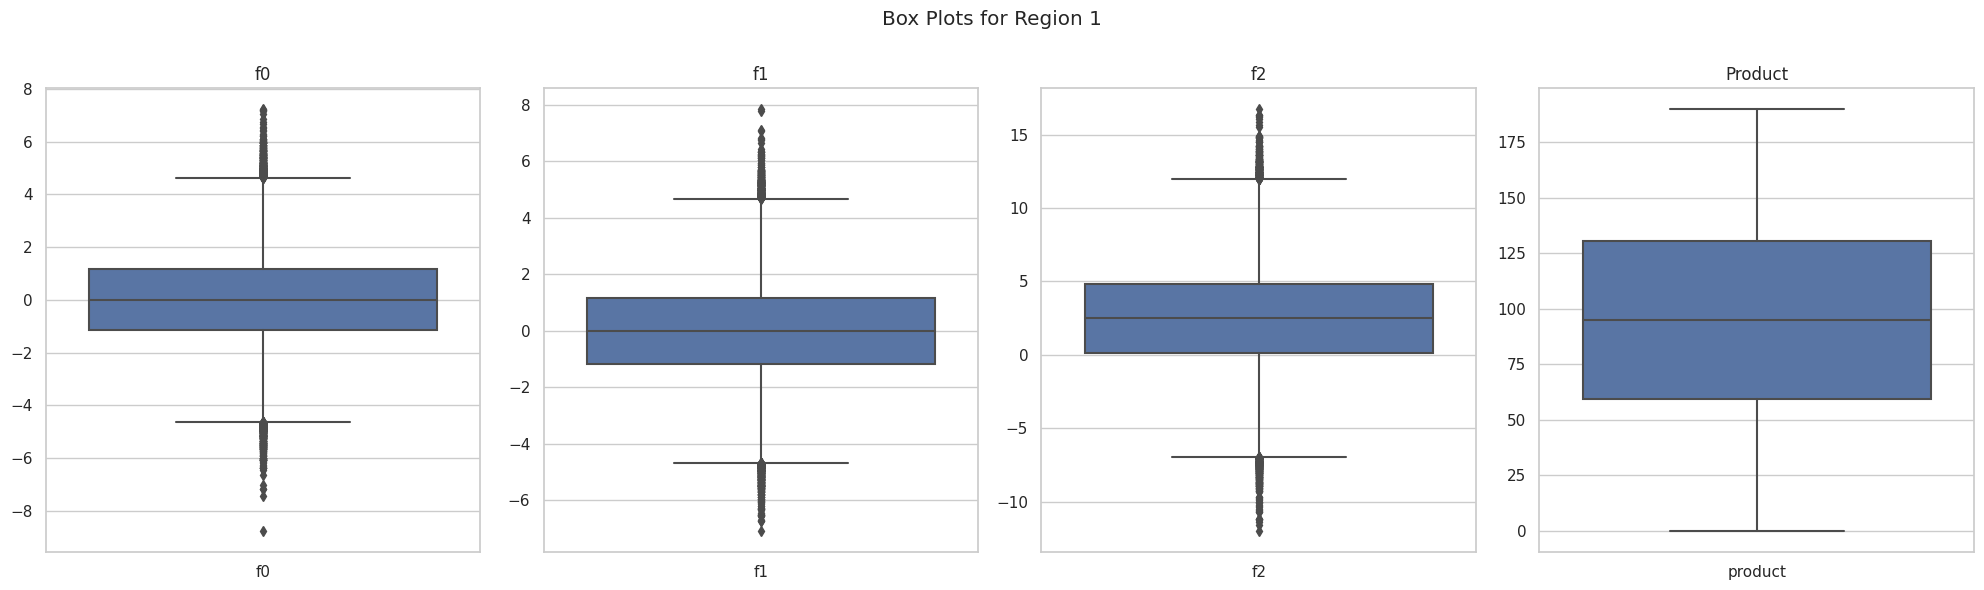

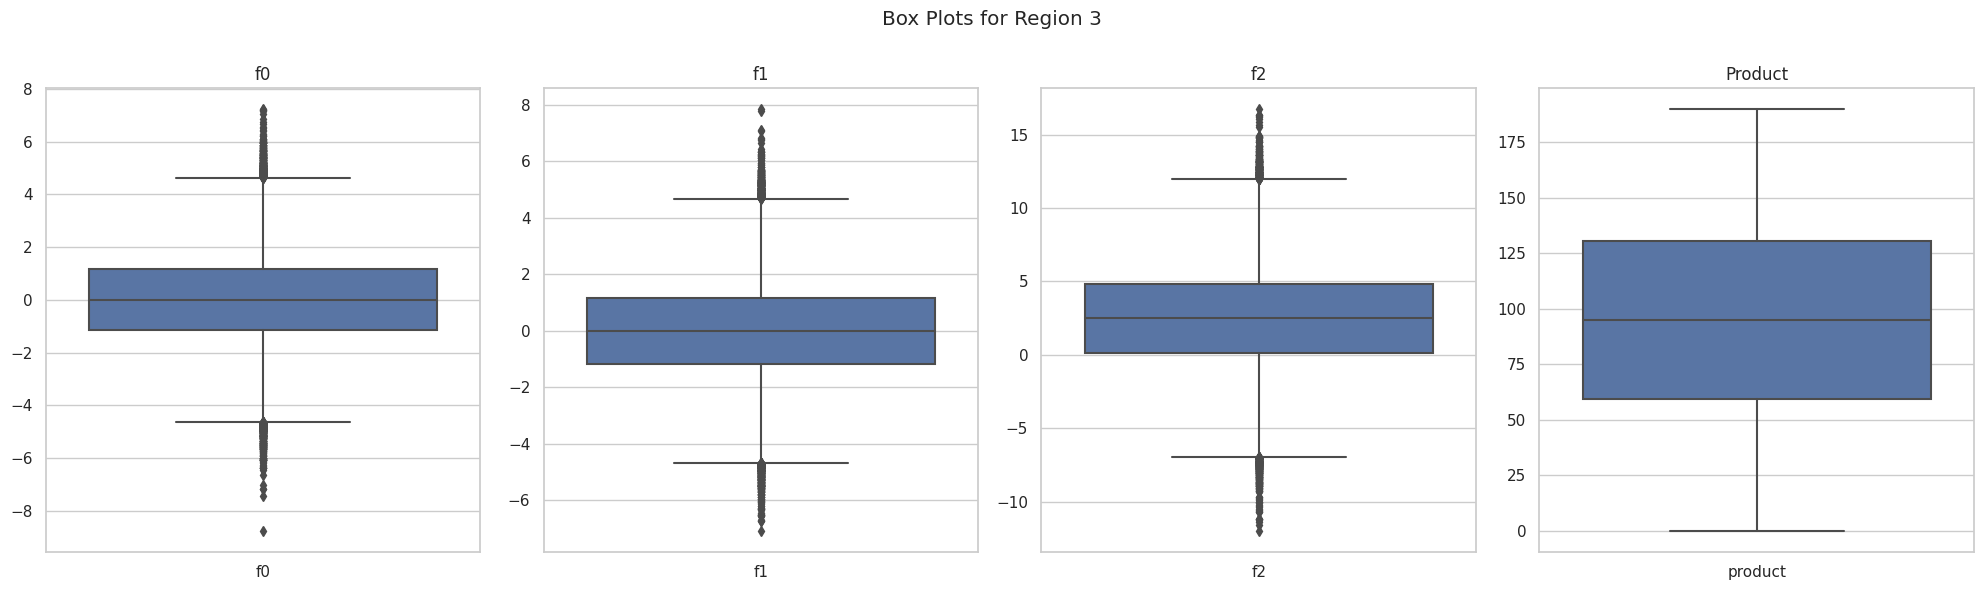

In [11]:
# Set up the plot style for better visualization
sns.set(style="whitegrid")

# Plot boxplots for each feature and target variable for Region 1 and Region 3
for region in [1, 3]: 
    # Box plots for features (f0, f1, f2) and the target variable (product)
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))
    fig.suptitle(f"Box Plots for Region {region}")
    
    sns.boxplot(data=region_data_region[['f0']], ax=axes[0])
    axes[0].set_title("f0")
    
    sns.boxplot(data=region_data_region[['f1']], ax=axes[1])
    axes[1].set_title("f1")
    
    sns.boxplot(data=region_data_region[['f2']], ax=axes[2])
    axes[2].set_title("f2")
    
    sns.boxplot(data=region_data_region[['product']], ax=axes[3])
    axes[3].set_title("Product")
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

There appears to be outliers in 'f2' for region 1 and region 3 is showing them in 'f0', 'f1' and 'f2'. I will remove the outliers to see if it improves the model. 

### Remove Outliers

In [12]:
def remove_outliers(df, columns):
    # Calculate the IQR for each column
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Determine the outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove the rows with outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Remove outliers for Region 1 and Region 3
for region in [1, 3]:
    region_data_region = region_data[region_data['region'] == region]
    region_data_clean = remove_outliers(region_data_region, ['f0', 'f1', 'f2', 'product'])
    
    print(f"Region {region} cleaned data: {region_data_clean.shape[0]} rows remaining after removing outliers.")

Region 1 cleaned data: 99494 rows remaining after removing outliers.
Region 3 cleaned data: 98003 rows remaining after removing outliers.


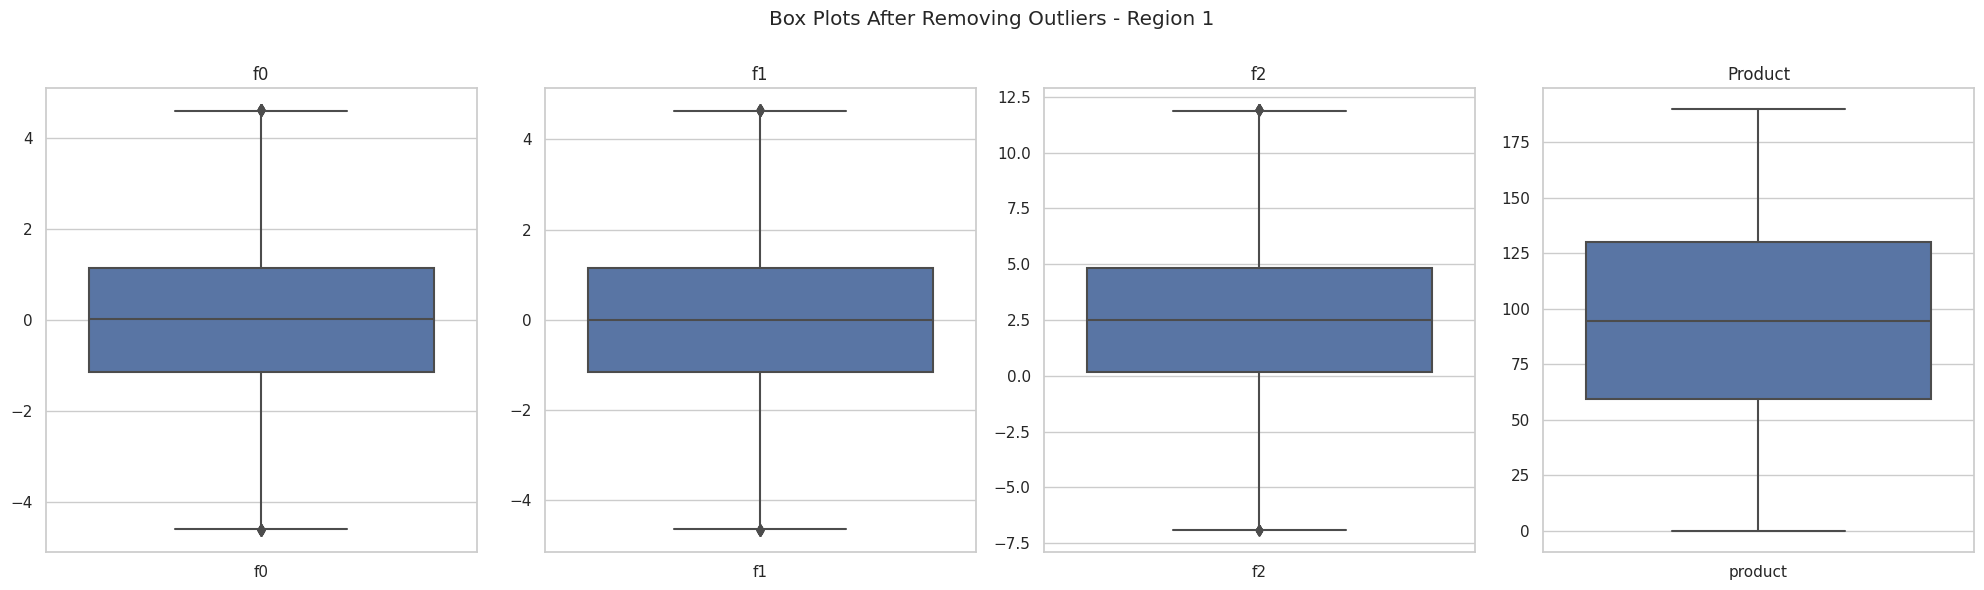

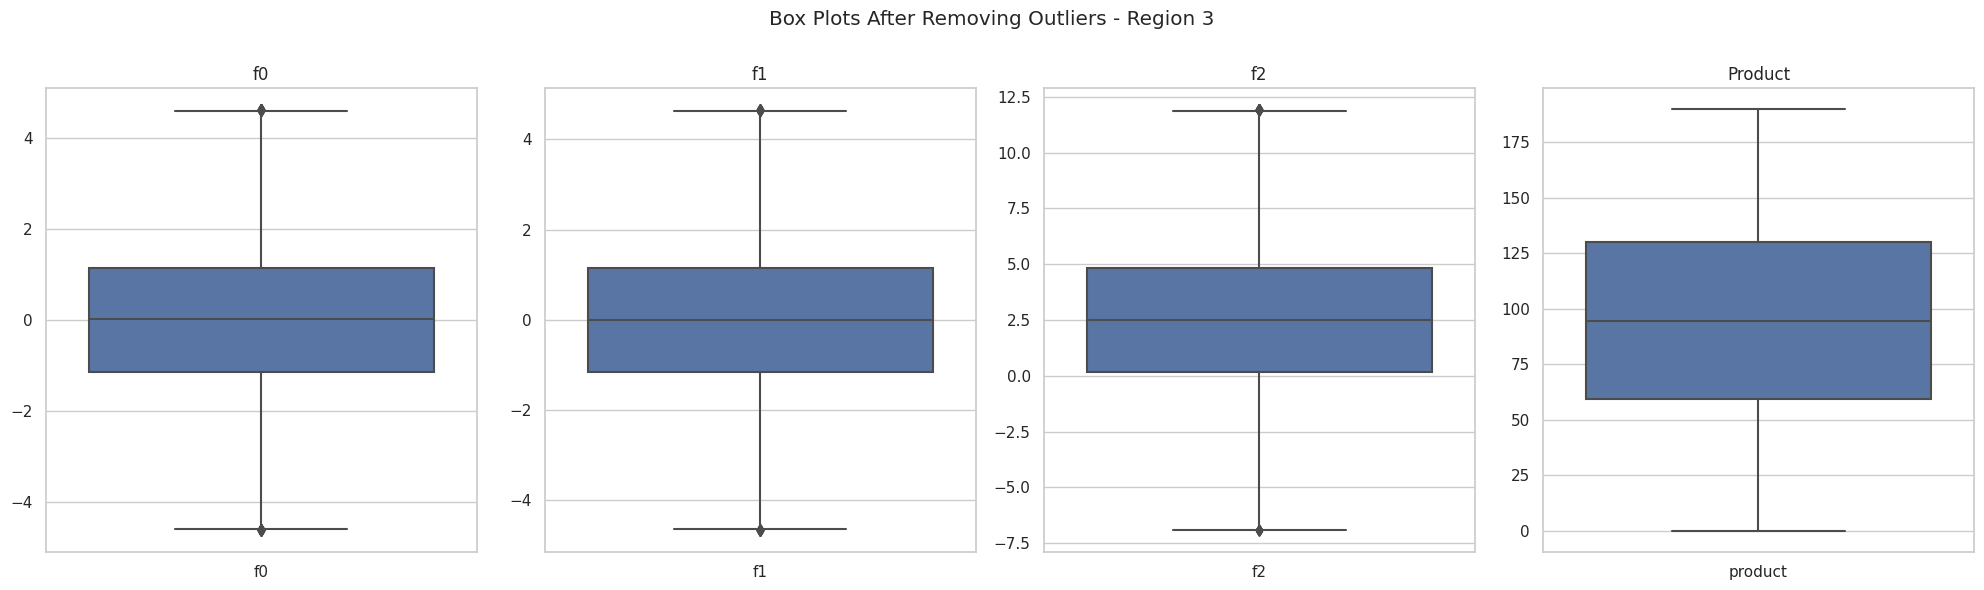

In [13]:
region_data_clean = remove_outliers(region_data_region, ['f0', 'f1', 'f2', 'product'])
    
# Visualize again after removing outliers
for region in [1, 3]:
    # Plot boxplots for cleaned data
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))
    fig.suptitle(f"Box Plots After Removing Outliers - Region {region}")
    
    sns.boxplot(data=region_data_clean[['f0']], ax=axes[0])
    axes[0].set_title("f0")
    
    sns.boxplot(data=region_data_clean[['f1']], ax=axes[1])
    axes[1].set_title("f1")
    
    sns.boxplot(data=region_data_clean[['f2']], ax=axes[2])
    axes[2].set_title("f2")
    
    sns.boxplot(data=region_data_clean[['product']], ax=axes[3])
    axes[3].set_title("Product")
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


Both regions appear to be in better condition now, so we can run the model again to assess the 'RMSE' and 'Average predicted volume'

### Confirm Model performance after removing outliers

In [14]:
for region in [1, 3]:
     # Calculate RMSE and average predicted volume
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    avg_predicted_volume = np.mean(y_pred_val)
    
    # Print model evaluation for region
    print(f"--Region {region} (After Outlier Removal)--")
    print(f"RMSE: {rmse:.2f}")
    print(f"Average predicted volume: {avg_predicted_volume:.2f} thousand barrels")
    print()

--Region 1 (After Outlier Removal)--
RMSE: 39.96
Average predicted volume: 95.09 thousand barrels

--Region 3 (After Outlier Removal)--
RMSE: 39.96
Average predicted volume: 95.09 thousand barrels



The RMSE didn't see much change after removing the outliers, which suggests that they didn't have a significant effect on the model. I am unsure how to improve the models accuracy.

## Prepare for Profit Calculation

In [15]:
# Define constants for profit calculation
development_budget = 100000000   # Total budget in USD
wells_to_develop = 200  # Number of wells to develop
revenue_per_barrel = 4500   # Revenue in USD 

# Calculate break-even volume per well
cost_per_well = development_budget / wells_to_develop
break_even_volume = cost_per_well / revenue_per_barrel  # in thousand barrels

print(f"Break-even volume per well: {break_even_volume:.2f} thousand barrels")

# Calculate the average volume per well for each region
average_volume_per_region = region_data.groupby('region')['product'].mean()

print("\nAverage volumes per region:")
print(average_volume_per_region)

# Compare break-even volume with average volume
print("\nComparison with break-even volume:")
for region, avg_volume in average_volume_per_region.items():
    feasibility = "Feasible" if avg_volume > break_even_volume else "Not Feasible"
    print(f"Region {region}: Avg Volume = {avg_volume:.2f} thousand barrels, {feasibility}")

Break-even volume per well: 111.11 thousand barrels

Average volumes per region:
region
1    92.500
2    68.825
3    95.000
Name: product, dtype: float64

Comparison with break-even volume:
Region 1: Avg Volume = 92.50 thousand barrels, Not Feasible
Region 2: Avg Volume = 68.83 thousand barrels, Not Feasible
Region 3: Avg Volume = 95.00 thousand barrels, Not Feasible


None of the regions have an average volume of reserves that meets the break-even requirement of 111.11 thousand barrels per well. This suggests that based on average volumes alone, none of the regions are economically viable for oil development.

## Risk Calculation using Bootstrapping

In [16]:
sample_size = 500  # Number of wells to sample for bootstrap
top_wells = 200  # Number of top wells based on predictions

# Dictionary to store results for each region
results = {}

# Perform bootstrapping for each region
for region in region_data['region'].unique():
    region_data_region = region_data[region_data['region'] == region]
    target = region_data_region['product']
    predictions = region_data_region['prediction']  
    profits = []

    for i in range(1000):  # 1000 bootstrap samples
        # Randomly sample 500 points
        sampled_indices = region_data_region.sample(sample_size, replace=True, random_state=random_state).index
        
        # Get predictions and corresponding targets for the sampled points
        sampled_predictions = region_data_region.loc[sampled_indices, 'prediction']
        sampled_targets = region_data_region.loc[sampled_indices, 'product']
        
        # Select the top 200 points by prediction
        top_200_predictions = sampled_predictions.sort_values(ascending=False).head(top_wells)
        top_200_indices = top_200_predictions.index
        
        # Get targets corresponding to the top 200 predictions
        top_200_targets = sampled_targets.loc[top_200_indices]
        
        # Calculate total revenue and profit
        total_reserves = top_200_targets.sum()
        revenue = total_reserves * revenue_per_barrel
        profit = revenue - development_budget
        profits.append(profit)
    
    # Convert profits to pandas Series for quantile calculations
    profits = pd.Series(profits)
    
    # Calculate metrics
    avg_profit = np.mean(profits)
    ci_lower = profits.quantile(0.025)
    ci_upper = profits.quantile(0.975)
    risk_of_loss = np.mean(profits < 0) * 100
    
    # Store results if risk of loss < 2.5%
    if risk_of_loss < 2.5:
        results[region] = {
            'avg_profit': avg_profit,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'risk_of_loss': risk_of_loss
        }
    
    # Print results for the region
    print(f"Region {region}:")
    print(f"  Average Profit: ${avg_profit:,.2f}")
    print(f"  95% Confidence Interval: (${ci_lower:,.2f}, ${ci_upper:,.2f})")
    print(f"  Risk of Loss: {risk_of_loss:.2f}%")
    print()
    
print('---------------')
# Select the region with the highest average profit
if results:
    best_region = max(results, key=lambda x: results[x]['avg_profit'])
    print(f"Best Region: {best_region}")
    print(f"  Average Profit: ${results[best_region]['avg_profit']:,.2f}")
    print(f"  95% Confidence Interval: (${results[best_region]['ci_lower']:,.2f}, ${results[best_region]['ci_upper']:,.2f})")
    print(f"  Risk of Loss: {results[best_region]['risk_of_loss']:.2f}%")
else:
    print("No region meets the risk of loss criteria.")

Region 1:
  Average Profit: $4,645,587.52
  95% Confidence Interval: ($-569,289.39, $10,139,508.50)
  Risk of Loss: 4.60%

Region 2:
  Average Profit: $4,932,149.17
  95% Confidence Interval: ($879,763.49, $9,302,973.75)
  Risk of Loss: 0.70%

Region 3:
  Average Profit: $4,234,544.33
  95% Confidence Interval: ($-1,222,070.74, $10,066,152.14)
  Risk of Loss: 6.10%

---------------
Best Region: 2
  Average Profit: $4,932,149.17
  95% Confidence Interval: ($879,763.49, $9,302,973.75)
  Risk of Loss: 0.70%


## Conclusion

The project specifies that only regions with a risk of loss below 2.5 percent are suitable for development. Region 2 meets this threshold and seems to be the most suitable for development. The break-even volume per well is 111.11 thousand barrels, but the average product volume for all regions is below this threshold. While none of the regions meet the break-even volume requirement, this does not necessarily disqualify them for development because the profit calculations account for predicted production (which is more refined than average volume). We'll still assess based on profits and loss risks.

Region 2 has the highest average profit (5,121,188.77 USD) and a positive confidence interval (95 percent CI: 818,185.66 to 9,239,078.97 USD). This indicates strong expected profitability with a reasonable margin of certainty. Region 1 has an average profit of $4,851,245.26 but a wide confidence interval (95 percent CI: -215,894.34 to 10,193,563.04 USD), suggesting uncertainty and the possibility of losses. Region 3 has the lowest average profit (4,146,939.43 USD) and the greatest uncertainty, with a negative lower bound and a high risk of loss (6.60 percent).

Region 2 is the best choice for development because it meets the risk of loss criteria (1.10 percent), has the highest average profit (5,121,188.77 USD), and benefits from highly accurate predictions (RMSE = 0.89). Proceed with development in Region 2 as it balances profitability, low risk, and prediction accuracy effectively.
